# California Housing

Este cadenor tem como referência o segundo capítulo (Projeto de Aprendizado de Máquina de Ponta a Ponta) do livro Hands-On Machine Learning with Scikit-Learn and TensorFlow. 

Repositório original do livro [aqui](https://github.com/ageron/handson-ml)

## Descrição

Neste capítulo veremos um exemplo de projeto de ponta a ponta.

Principais passos:

* 1. Olhar para o quadro geral;
* 2. Obter os dados;
* 3. Descobrir e visualizar os dados para obter informações;
* 4. Preparar os dados para os algoritmos de Aprendizado de Máquina;
* 5. Selecionar e treinar um modelo;
* 6. Ajustar o seu modelo;
* 7. Apresentar sua solução;
* 8. Lançar, monitorar e manter seu sistema.



## Trabalhando com dados reais

- Repositórios populares de *open data*:

[UC Irvine Machine Learnig Repository]()

[Conjunto de dados no Kaggle]()

[Conjunto de Dados no AWS da Amazon]()

- Meta portais (listam repositórios *open data*):

[Data Portals]()

[Open Data Monitor]()

[Quandl]()

- Outras páginas (*open data*):

[Lista de conjuntos de dados de Aprendizado de Máquina do Wikipedia]()
 
[Pergunta no Quora.com]()
 
[Conjuntos de dados no Reddit]()
 
 


## Banco de dados utilizado neste capítulo

Para este capítulo, usaremos o conjunto de dados do repositório StatLib referente a preços do setor imobiliário na Califórnia.

A primeira tarefa será construir um modelo de preços do setor imobiliário utilizando os dados do censo da Califórnia. Esses dados têm métricas como população, renda média, preço médio do setor imobiliário e assim por diante para cada grupo de bairros.

Este modelo deve aprender com esses dados e ser capaz de prever o preço médio em qualquer bairro, considerando todas as outras métricas.

Esse sistema de downstream determinará se vale a pena investir em uma determinada área ou não. É fundamental acertar nessa etapa, uma vez que afetará diretamente a receita.

## Enquadre o problema

Claramente temos uma tarefa típica de aprendizado supervisionado.

Além disso, também é uma tarefa típica de regressão, já que é solicitado a previsão de um valor.

Mas especificamente, trata-se de um problema de **regressão multivariada**, uma vez que o sistema utilizará múltiplas características para fazer uma previsão.

## Selecione uma Medida de Desempenho

Uma medida típica de desempenho para problemas de regressão é a **Raiz do Erro Quadrático** (root-mean-square error [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation))

Ela dá uma ideia da quantidade de erros gerados pelo sistema em suas previsões, com um peso maior para grandes erros.

## Verifique as Hipóteses

Uma boa prática é listar e verificar as hipóteses que foram feitas até agora; fica mais fácil pegar problemas sérios logo no início. Por exemplo, os preços dos bairros mostrados pelo seu sistema serão alimentados em um sistema downstream do ML, e assumiremos que esses preços serão usados como tal. Mas, e se o sistema downstream converter os preços em categorias ( 'barato', 'médio' ou 'caro', por exemplo) e utilizar essas categorias em vez dos próprios preços?

Neste caso, não é importante saber o preço exato se o seu sistema só precisa obter a categoria certa.

Para este exemplo, vamos realmente buscar os preços reais dos imóveis.

# Mãos à Obra

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('C:/Users/Renato/Dropbox/pos_usp/usp_data_open/machine_learning/hands-on_machine_learning_with_scikit-learn/datasets/housing/housing.csv')

In [3]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
# Existem 10 atributos. Cada linha representa um bairro.

housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
# O método .info() é útil para a obtenção de uma rápida descrição dos dados.

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Existem 20639 instãncias no conjunto de dados (observações). 
# Podemos confirmar utilizando o método .shape

housing.shape # a primeira linha sáo os títulos das variáveis, então, são 20640 linhas - 1 = 20639 observações
              # 10 colunas. 10 variáveis

(20640, 10)

Repare que total_bedrooms tem apenas 20433 valores 'non-null', significando que 207 bairros não possuem esta caraterística. Cuidaremos disso mais tarde.

Repare também que todos os atributos são numericos (float64) exceto **ocen_proximity** (object).

Provavelmente, ocean_proximity é um atributo de texto (categórico). Podemos descobrir quais categorias existem e quantos bairros pertence a cada provável categória utilizando o método **.value_counts()**.

In [7]:
# descobrindo quais categorias existem e quantos bairros pertence a cada uma

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# Vamos olhar para outros campos. O método .describe() mostra um resumo dos atributos numéricos

housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Observe que os valores nulos são ignorados (total_bedrooms <- count 20433).

Outro método rápido de perceber o tipo de dados com o qual estamos lidando é traçar um histograma para cada atributo numérico.

Um histograma mostra o número de instâncias (no eixo vertical) que possuem um determinado intervalo de valores (no eixo horizontal).

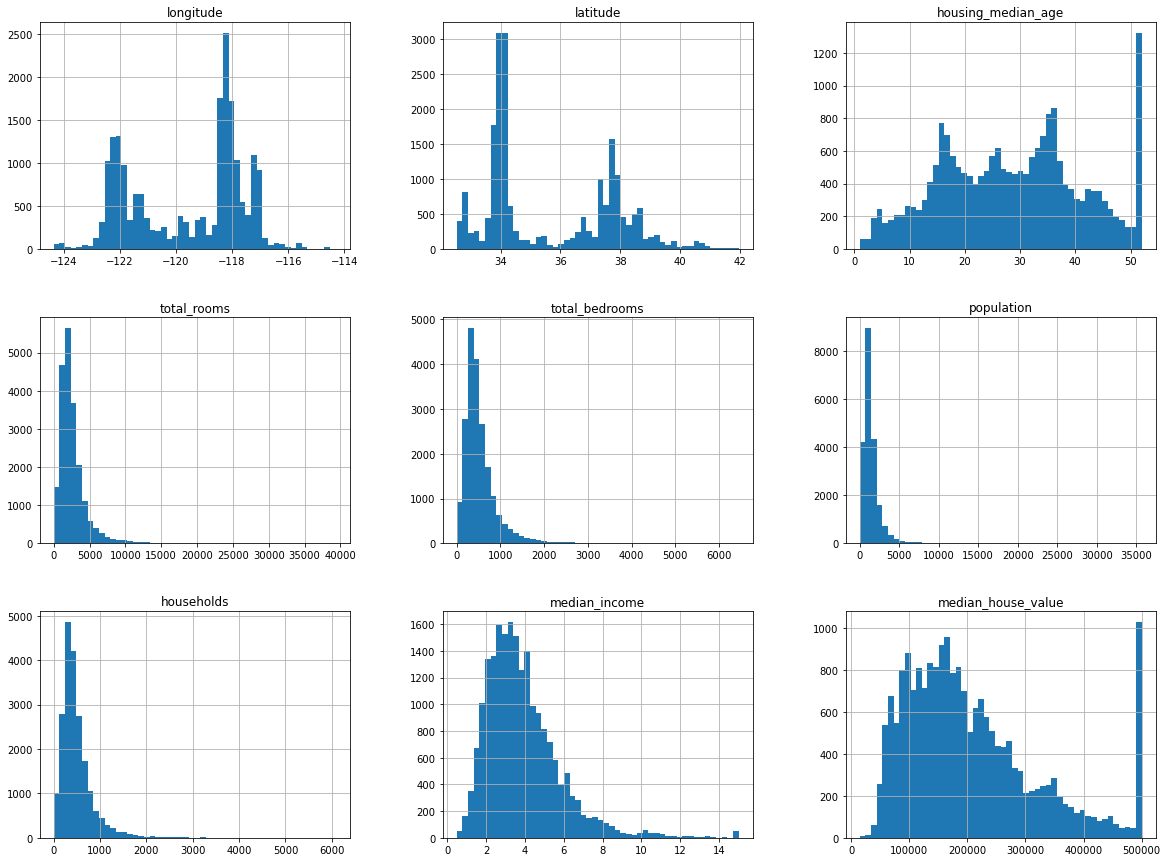

In [9]:
# importando o matplotlib e definindo algumas opções de plotagem
import matplotlib.pyplot as plt # importa o pacote de plotagem

# renderiza a plotagem dentro do jupyter notebook
%matplotlib inline


housing.hist(bins=50, figsize=(20, 15))
plt.show()

Preste atenção em alguns pontos destes histogramas:

1. O atributo da renda média não pareceestar expresso em dólares americanos. Na verdade os dados foram dimensionados e limitados em 15 (15,0001) para a média dos maiores rendimentos, e em 0,5 (0,4999) para a média dos rendimentos mais baixos.

2. A idade média e o valor médio da casa também foram limitados. Este último pode ser um problema sério, pois é nosso atributo alvo (rótulos).

3. Esses atributos têm escalas muito diferentes.

4. Muitos histograma têm um rastro alongado: eles se estendem muito mais à direita da média do que à esquerda. Isso pode dificultar a detecção de padrões em alguns algoritmos de ML

## Criando um Conjunto de Teste

Criar um conjunto de teste é, teoricamente, bastante simples: basta escolher aleatoriamente algumas instâncias, geralmente 20% do conjunto de dados, e colocá-las de lado:

In [10]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))     # cada execução apresentara treino e teste diferente, não é bom
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[ :test_set_size]
    train_indices = shuffled_indices[test_set_size: ]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# chamando a função

train_set, test_set = split_train_test(housing, 0.2)

print(len(train_set), "train + ", len(test_set), "test")

16512 train +  4128 test


16512 observações para teinamento e 4128 para testes (80%, 20%)

In [12]:
## As próximas linhas garantirá que que o conjunto de teste permanecerá consistente durante as execuções

from zlib import crc32

In [13]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Infelizmente, o conjunto de dados não possui uma coluna de identificação.

Para isso, utilizaremos o índice da linha como ID

In [14]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [15]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [16]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [17]:
test_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
59     59    -122.29     37.82                 2.0        158.0   
60     60    -122.29     37.83                52.0       1121.0   
61     61    -122.29     37.82                49.0        135.0   
62     62    -122.29     37.81                50.0        760.0   
67     67    -122.29     37.80                52.0       1027.0   

    total_bedrooms  population  households  median_income  median_house_value  \
59            43.0        94.0        57.0         2.5625             60000.0   
60           211.0       554.0       187.0         3.3929             75700.0   
61            29.0        86.0        23.0         6.1183             75000.0   
62           190.0       377.0       122.0         0.9011             86100.0   
67           244.0       492.0       147.0         2.6094             81300.0   

   ocean_proximity         id  
59        NEAR BAY -122252.18  
60        NEAR BAY -122252.17  
61        NEAR BAY -122252.18  
62        NEAR BAY -122252.19  
67        NEAR BAY -122252.20

In [18]:
train_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
2      2    -122.24     37.85                52.0       1467.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
2           190.0       496.0       177.0         7.2574            352100.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   

  ocean_proximity         id  
0        NEAR BAY -122192.12  
1        NEAR BAY -122182.14  
2        NEAR BAY -122202.15  
3        NEAR BAY -122212.15  
4        NEAR BAY -122212.15

O Scikit-Learn fornece algumas funções para dividir conjuntos de dados em vários subconjuntos de diversas maneiras.



In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<AxesSubplot:>

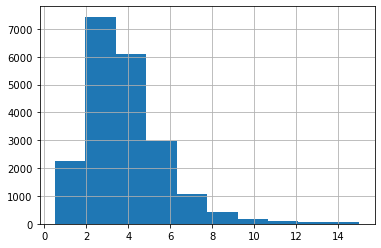

In [20]:
housing["median_income"].hist()

O código a seguir cria um atributo da categoria da renda dividindo a renda média por 1,5 (para limitar o número de categorias da renda) e arredondando com a utilização do ceil (para categorias discretas) e, em seguida, mesclando todas as categorias maiores que 5, na categoria 5:

In [21]:
# Divida por 1,5 para limitar o número de categorias de renda

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

In [22]:
# Rotule os acima de 5 como 5

housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [23]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [24]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

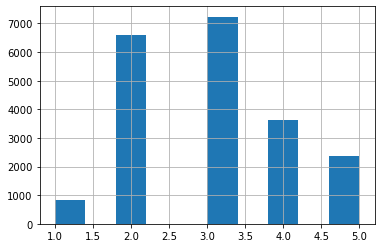

In [25]:
housing["income_cat"].hist()

Agora estamos pronto para fazer uma amostragem estratificada com base na categoria da renda. Para isso podemos utilizar a classe **StratifiedShuffleSplit** do Scikit-Learn:

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [27]:
# vamos ver se isso funcionou como esperado

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [28]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [29]:
# Comparação de viés de amostragem estratificada versus amostragem aleatória

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [30]:
# Comparação de viés de amostragem estratificada versus amostragem aleatória

compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.039826    0.039729  0.040213      0.973236      -0.243309
2  0.318847    0.318798  0.324370      1.732260      -0.015195
3  0.350581    0.350533  0.358527      2.266446      -0.013820
4  0.176308    0.176357  0.167393     -5.056334       0.027480
5  0.114438    0.114583  0.109496     -4.318374       0.127011

In [31]:
# Agora devemos remover o atributo *income_cat* para que os dados voltem ao seu estado original

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Descubra e Visualize os Dados para Obter Informações

In [32]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

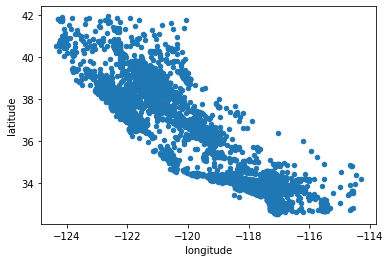

In [33]:
# Visualize Dados Geográficos

# Como existem dados geograficos é uma boa ideia criar um diagrma de dispersão para visualizar os dados de todos os bairros

housing.plot(kind="scatter", x="longitude", y="latitude")

Isso se parece com a Califónia :)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

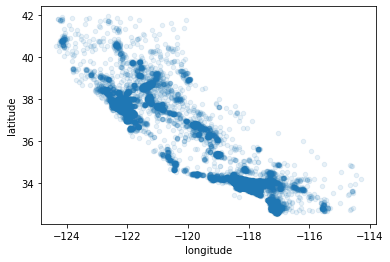

In [34]:
# definir a opção alpha em 0,1 facilita a visualização dos locais onde existe uma alta densidade de pontos de dados

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

O argumento sharex = False corrige um bug de exibição (os valores do eixo x e a legenda não foram exibidos). Esta é uma correção temporária (consulte: https://github.com/pandas-dev/pandas/issues/10611). 

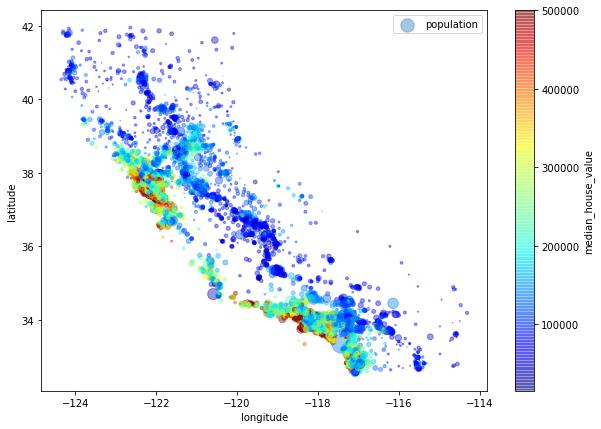

In [35]:
# Preços das casas na Califórnia

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

#save_fig("housing_prices_scatterplot")

A imagem acima informa os preços do setor imobiliário estão muito relacionados à localização (por exemplo, perto do oceano) e à densidade populacional, como provavelmente seria o esperado.

Será útil utilizar um algoritmo de agrupamento para detectar os grupos principais e adicionar novas características que medem a proximidade com os centros de agrupamento.

O atributo de proximidade do oceano também pode ser útil, embora na costa norte da Califórnia os preços não estejam muito altos, então esssa não é uma regra simples.

## Buscando Correlações

Uma vez que o conjunto de dados não é muito grande, podemos calcular facilmente o **coeficiente de correlação padrão** (chamado também de *r de Pearson*) entre cada par de atributos utilizando o método corr():

In [36]:
corr_matrix = housing.corr()

In [37]:
# vejamos o quanto cada atributo se correlaciona com o valor médio da habitação

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

O coeficiente de correlação varia de -1 a 1.

Quando está próximo de 1, significa que existe uma forte correlação positiva; por exemplo, o valor médio da habitação tende a aumentar quando a renda média aumenta.

Quando o coeficiente está próximo de -1, siginifica que existe uma forte correlação negativa: é possível ver uma pequena correlação negativa entre a latitude e o valor médio da habitação (ou seja, os preços tendem a diminuir quando você vai para o norte)

Finalmente, coeficientes próximos de zero significam que não há correlação linear.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

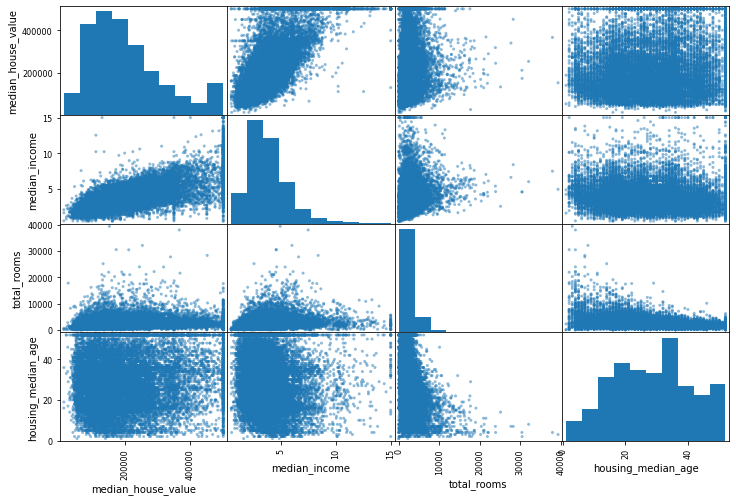

In [38]:
# Outra maneira de verificar a correlação entre atributos é utilizar a função scater_matrix, do Pandas

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")

(0.0, 16.0, 0.0, 550000.0)

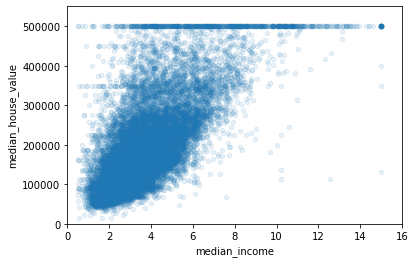

In [39]:
# O atributo mais promissor para prever o valor médio da habitação é a renda média,
# então vamos observar o gráfico de dispersão de correlação

housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
#save_fig("income_vs_house_value_scatterplot")

## Experimentando com Combinações de Atributo

A última coisa que podemos querer fazer é tentar várias combinações de atributos antes de preparar os dados para os algoritmos de ML.

Por exemplo, o número total de cômodos em um bairro não terá muita utilidade se não soubermos quantos domicílios existem. O que realmente queremos é o número de cômoos por domicílio.

Da mesma forma o número total de quartos por si só não é muito útil: provavelmente queremos compará-lo com o número de cômodos. E a população por domicílio também parece uma combinação de atributos interessante.

Criaremos esses atributos abaixo:

In [40]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [41]:
# visualizando os novos atributos criados acima

housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  median_house_value  \
17606       710.0       339.0         2.7042            286600.0   
18632       306.0       113.0         6.4214            340600.0   
14650       936.0       462.0         2.8621            196900.0   
3230       1460.0       353.0         1.8839             46300.0   
3555       4459.0      1463.0         3.0347            254500.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
17606       <1H OCEAN             4.625369           0.223852   
18632       <1H OCEAN             6.008850           0.159057   
14650      NEAR OCEAN             4.225108           0.241291   
3230           INLAND             5.232295           0.200866   
3555        <1H OCEAN             4.505810           0.231341   

       population_per_household  
17606                  2.094395  
18632                  2.707965  
14650                  2.025974  
3230                   4.135977  
3555                   3.047847

In [42]:
# agora, vejamos a matriz de correlação novamente

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

O novo atributo bredrooms_per_room está muito mais correlacionado com o valor médio da habitação do que com o número total de cômodos ou quartos.

Aparentemente, habitações com uma baixa relação quarto/cômodo tendem a ser mais caras.

O número de cômodos por família também é mais informativo do que o número total de cômodos em um bairro - obviamente, quanto maiores as habitações, mais caras elas serão.

## Preparando os Dados para Algoritmos de ML

Ao invés de prepararmos os dados para seus algoritmos de ML manualmente, podemos escrever funções. Isso é bom por diferentes motivos:

* Isso permitirá suaa reprodução em qualquer conjuntos de dados;
* Contruíremos uma biblioteca de funções de transformação que poderão ser reutilizadas em projetos futuros;
* Podemos usar essas funções em seu sistema para transformar os novos dados antes de fornecê-lo aos seus algoritmos;
* Possibilitará várias tentativas de transformações.

Mas primeiro vamos reverter para um conjunto de treinamento limpo (copiando star_train mais uma vez), e vamos separar os previsores e os rótulos, uma vez que não queremos necessariamente aplicar as mesmas transformações às previsões e aos valores-alvos.

In [43]:
# Observe que drop() cria uma cópia dos dados e não afeta strat_train_set

housing = strat_train_set.drop("median_house_value", axis=1)

In [44]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN

In [45]:
housing_labels = strat_train_set["median_house_value"].copy()

In [46]:
housing_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

## Limpando os Dados

A maioria dos algoritmos de ML não podem funcionar com características faltantes, então criaremos algumas funções para cuidar delas. 

(lembra que o atributo *total_bredrooms* tem alguns valores faltantes? Então, é isso que vamos consertar)

Podemos cuidar disso utilizando os métodos **.dropna()**, **.drop()** e **.fillna()**:

```python
housing.dropna(subset=["total_bedrooms"])       # opção 1

housing.drop("total_bedrooms", axis=1)          # opção 2

median = housing["total_bedrooms"].median()     # opção 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

Também, o Scikit-Learn fornece uma classe acessível para cuidar dos valores faltantes: **Imputer**:



In [47]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [48]:
# Remova o atributo de texto porque a mediana só pode ser calculada em atributos numéricos:

# opções:
# housing_num = housing.drop('ocean_proximity', axis=1)
# housing_num = housing.select_dtypes(include=[np.number])

housing_num = housing.select_dtypes(include=[np.number])

In [49]:
housing_num.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  
17606       710.0       339.0         2.7042  
18632       306.0       113.0         6.4214  
14650       936.0       462.0         2.8621  
3230       1460.0       353.0         1.8839  
3555       4459.0      1463.0         3.0347

In [50]:
# agora podemos ajustar a instãncia imputer aos dados de treinamento utilizando o método fit()

imputer.fit(housing_num)

SimpleImputer(strategy='median')

O **imputer** simplesmente calculou a média de cada atributo e armazenou o resultado em sua variável da instância **statistics_**.

In [51]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [52]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Agora podemos usar o **imputer** "treinado" substituindo os valores perdidos pelas médias aprendiadas a fim de transformar o conjunto de treinamento

In [53]:
X = imputer.transform(housing_num)

O resultado é um array Numpy simples contendo as características transformadas.

In [54]:
# Colocando as caracteristicas transformadas de volta em um DataFrame

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [55]:
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  
17606       710.0       339.0         2.7042  
18632       306.0       113.0         6.4214  
14650       936.0       462.0         2.8621  
3230       1460.0       353.0         1.8839  
3555       4459.0      1463.0         3.0347

## Manipulando Texto e Atributos Categóricos

Anteriormente, excluímos o atributo categórico **ocean_proximity** por não ser um atributo númerico:

In [56]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(15)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN
16365          INLAND
19684          INLAND
19234       <1H OCEAN
13956          INLAND
2390           INLAND

In [57]:
# convertendo essas categorias e texto para número utilizando o método factorize()

from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder

In [58]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Por padrão, a classe OneHotEncoder retorna uma matriz esparsa, mas podemos convertê-la em uma matriz densa, se necessário, chamando o método toarray ():

In [59]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Como alternativa, você pode definir sparse = False ao criar o OneHotEncoder:

```python
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
```

Saída:
```python
Out[n]:
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])
```

In [60]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [61]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

## Customize Transformadores



In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

**add_bedrooms_per_room** é o o hiperparâmetro  do transformador acima.

## Pipelines de Transformação

O Scikit-Learn nos fornece a classe PipeLine para ajudar com as etapas de transformação de dados na ordem correta.

Aqui um pequeno PipeLine para os atributos numéricos:

In [63]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [64]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

longitude latitude housing_median_age total_rooms total_bedrooms  \
17606   -121.89    37.29                 38        1568            351   
18632   -121.93    37.05                 14         679            108   
14650    -117.2    32.77                 31        1952            471   
3230    -119.61    36.31                 25        1847            371   
3555    -118.59    34.23                 17        6592           1525   

      population households median_income ocean_proximity rooms_per_household  \
17606        710        339        2.7042       <1H OCEAN             4.62537   
18632        306        113        6.4214       <1H OCEAN             6.00885   
14650        936        462        2.8621      NEAR OCEAN             4.22511   
3230        1460        353        1.8839          INLAND             5.23229   
3555        4459       1463        3.0347       <1H OCEAN             4.50581   

      population_per_household  
17606                   2.0944  
18632                  2.70796  
14650                  2.02597  
3230                   4.13598  
3555                   3.04785

In [65]:
# PipeLine para atributos númericos

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [66]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

Para referência, aqui está a solução antiga baseada em um transformador DataFrameSelector (apenas para selecionar um subconjunto das colunas DataFrame do Pandas) e um FeatureUnion:

In [67]:
from sklearn.compose import ColumnTransformer

In [68]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [69]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [70]:
housing_prepared.shape

(16512, 16)

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [72]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [73]:
# Juntando os dois pipeline em um único utilizando a classe Featureunio do Scikit-Learn

from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [74]:
#Executando o pipeline

old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [75]:
np.allclose(housing_prepared, old_housing_prepared)

True

## Selecionando e Treinando um Modelo

pág.72

In [76]:
# treinaremos primeiro um modelo de Regressão Linear

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [77]:
# aplicando pipeline completo em algumas instâncias de treinamento

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [78]:
# Compare com os valores reais

print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [79]:
# medindo a RMSE desse modelo em todo o conj. de treinamento com o uso da função mean_squared_error do SL

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
#lin_rmse

print(f"Margem de erro de: US$ {lin_rmse}")

Margem de erro de: US$ 68628.19819848923


Levando em consideração que o preço médio das casas (median_housing_values) dos bairros varia entre 120 mil e 265 mil dólares, então um erro típico de 68 mil não é muito aceitável.

In [80]:
# tentando um modelo de Árvore de decisão
# treinamento

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

In [81]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [82]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Nenhum erro? É provável que esse modelo tenha se **sobreajustado mal aos dados**.

No aprendizado de máquina, o sobreajuste significa que o modelo funcina bem nos dados de treinamento, mas não generaliza bem.

O sobreajuste acontece quando o modelo é muito complexo em relação à quantidade e ao ruído dos dados de treinamento. As possíveis soluções são:

- Simplificar o modelo ao selecionar um com menos parâmetros, reduzindo o número de atributos nos dados de treinamento ou restringindo o modelo;
- Coletar mais dados de treinamento;
- Reduzir o ruído nos dados de treinamento.

Não podemos tocar no conjunto de testes até que esteja pronto para lançar um modelo confiável, etão utilizaremos parte do conjunto de treinamento para treinar, e parte para validar

## Avaliando Melhor com a Utilização da Validaçã Cruzada

Uma maneira de avaliar o modelo da **Árvore de Decisão** seria utilizar a função *train_test_split* para dividir o conjunto de treinamento em um conjunto menor de treinamento e um conjunto de validação, em seguida treinar seus modelos com o conjunto menor e avaliá-los com o conjunto de validação.

In [83]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [85]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"\nMean: {scores.mean()}")
    print(f"\nStandard deviation: {scores.std()}")

display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]

Mean: 71407.68766037929

Standard deviation: 2439.4345041191004


Parece ser pior do que o modelo de Regressão Linear, agora!

Calcularemos as mesmas pontuações para o modelo de Regressão Linear apenas para ter certeza:

In [87]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]

Mean: 69052.46136345083

Standard deviation: 2731.6740017983493


É isso mesmo: o modelo da Árvore de Decisão está se sobreajustando tanto que acaba sendo pior do que o modelo de Regressão Linear.

In [88]:
# tentando um modelo de RandonForestRegressor (floresta aleatória)

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [89]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [92]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]

Mean: 52583.72407377466

Standard deviation: 2298.353351147122


Isso é muito melhor: floresta aleatória parece ser promissor.

No entanto, note que a pontuação no conjunto de treinamento ainda é muito menor do que nos conjuntos de validação, o que significa que o modelo ainda está se sobreajustando ao conjunto de treinamento.

In [93]:
# pág. 76 - 77

## Analisando os Melhores Modelos e Seus Erros



## Avaliando Seu Sistema no Conjunto de Testes